Text(0, 0.5, 'Cumulative Sum')

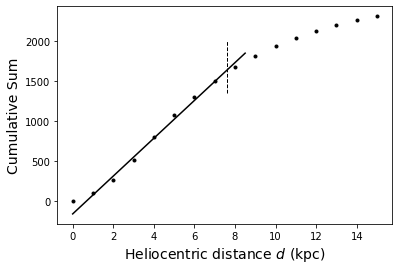

In [106]:
#Figure 1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1=pd.read_csv('final_type1.csv') #reading csv file through pandas

count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
count10=0
count11=0
count12=0
count13=0
count14=0
count15=0

ml1=[x for x in df1['d'] if x<1]
ml2=[x for x in df1['d'] if x<2]
ml3=[x for x in df1['d'] if x<3]
ml4=[x for x in df1['d'] if x<4]
ml5=[x for x in df1['d'] if x<5]
ml6=[x for x in df1['d'] if x<6]
ml7=[x for x in df1['d'] if x<7]
ml8=[x for x in df1['d'] if x<8]
ml9=[x for x in df1['d'] if x<9]
ml10=[x for x in df1['d'] if x<10]
ml11=[x for x in df1['d'] if x<11]
ml12=[x for x in df1['d'] if x<12]
ml13=[x for x in df1['d'] if x<13]
ml14=[x for x in df1['d'] if x<14]
ml15=[x for x in df1['d'] if x<15] # performing cumulative sum.



xd=np.linspace(0,15,16)
yd=[0,len(ml1),len(ml2),len(ml3),len(ml4),len(ml5),len(ml6),len(ml7),len(ml8),len(ml9),len(ml10),len(ml11),len(ml12),len(ml13),len(ml14),len(ml15)]


x=xd[1:9]#choosing x-points
y=yd[1:9]#choosing y-points
s1=0
s2=0
s3=0
s4=0
n=len(x)
for i in range(len(x)):  #least square curve fit
    s1=s1+x[i]
    s2=s2+x[i]*x[i]
    s3=s3+x[i]*y[i]
    s4=s4+y[i]
a=(n*s3-s1*s4)/(n*s2-s1**2) # finding slope
b=(s4-a*s1)/n # finding intercept
x1=np.linspace(0,8.5,10) #defining length of the fit
plt.vlines(x=[7.6], ymin=[1350], ymax=[2000], colors='black', ls='--', lw=1,) #plotting vertical line with coordinates specified in ymin and ymax
plt.plot(xd,yd,".k") #plotting the data points
plt.plot(x1,a*x1+b,"k") #plotting linear fit
plt.xlabel('Heliocentric distance $d$ (kpc)',fontsize=14) # x label
plt.ylabel('Cumulative Sum',fontsize=14) # ylabel
#plt.savefig('cumulativesum.jpg',dpi=1000)

(array([-2.61799388, -2.0943951 , -1.57079633, -1.04719755, -0.52359878,
         0.        ,  0.52359878,  1.04719755,  1.57079633,  2.0943951 ,
         2.61799388]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

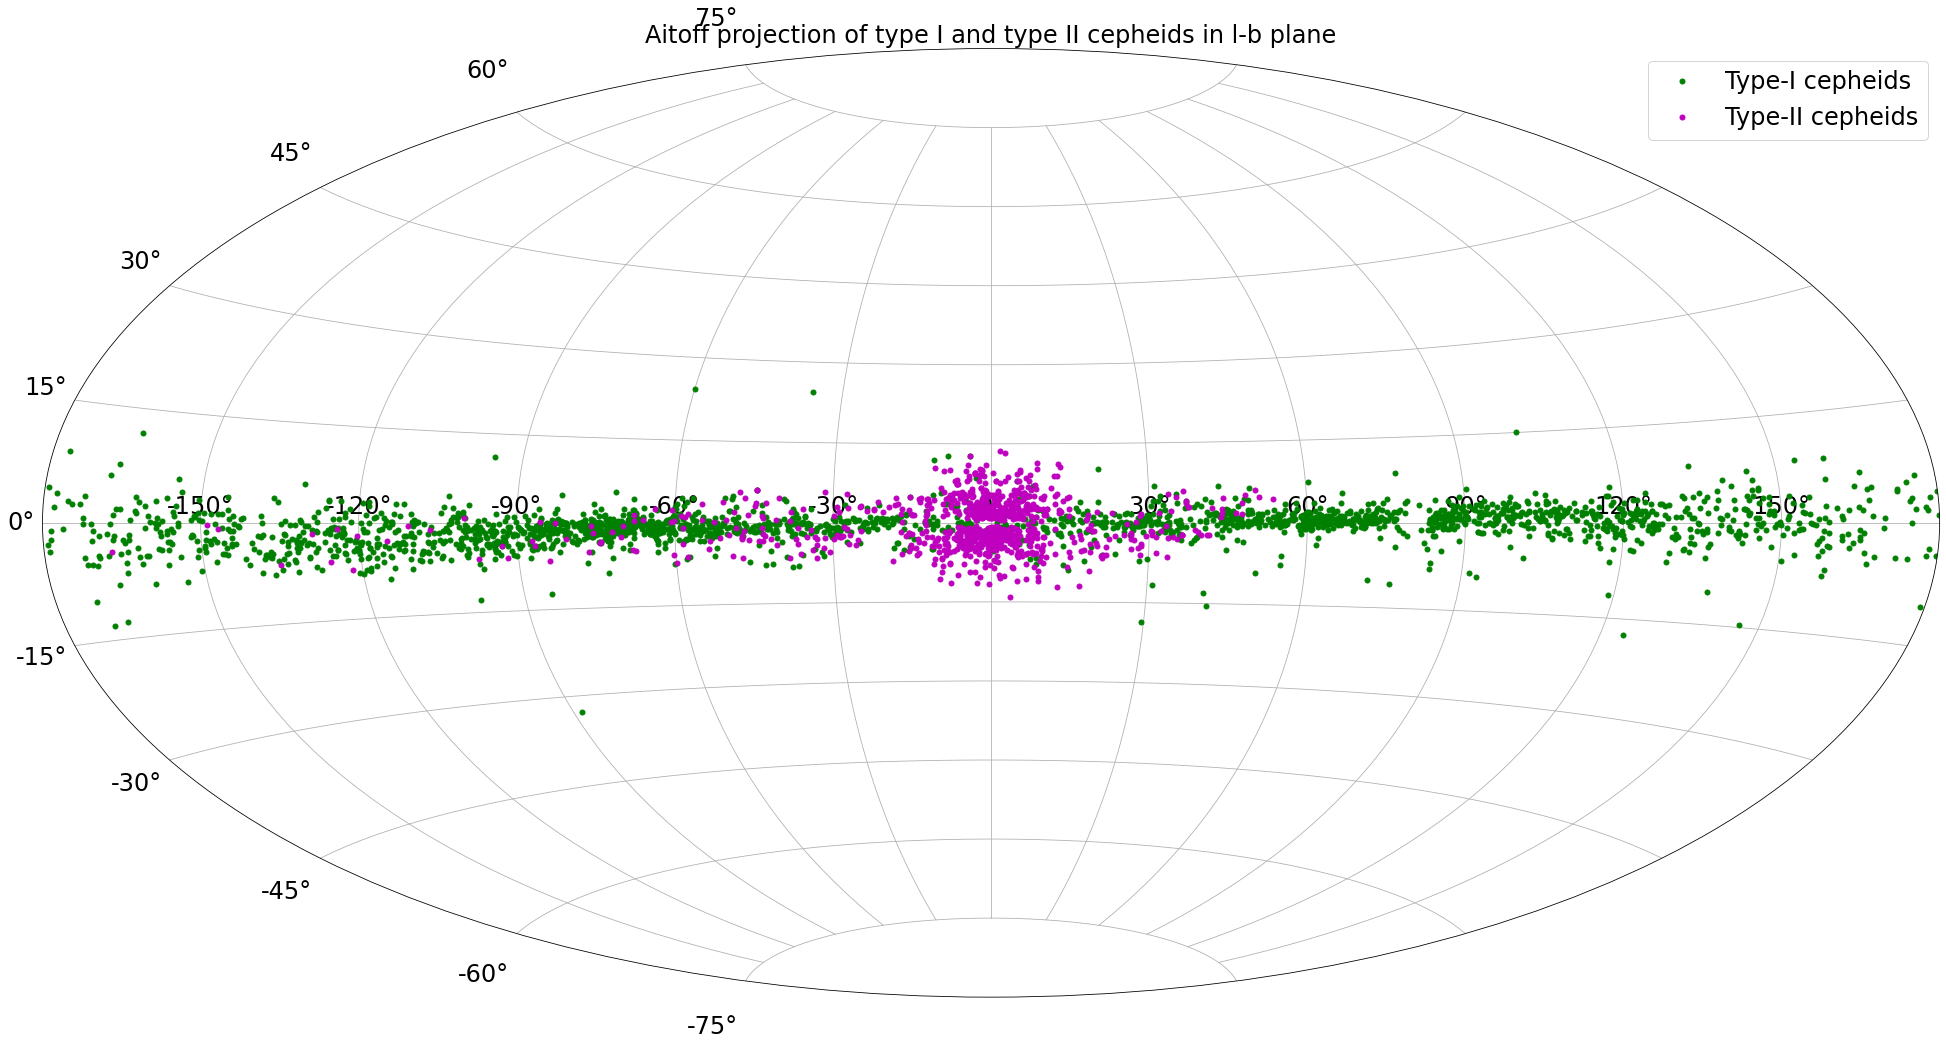

In [107]:
#Figure 2

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

df1=pd.read_csv('Final_Allccep - Sheet1.csv')
df2=pd.read_csv('Final_Allt2cep - Gaia 1-1626.csv')

#defining variables and conversion to radians
l1=df1['l']
b1=df1['b']
longr1 = np.radians(l1)
latr1 = np.radians(b1)

l2=df2['l']
b2=df2['b']
longr2 = np.radians(l2)
latr2 = np.radians(b2)


c1 = SkyCoord(ra=longr1, dec=latr1, frame='icrs',unit = 'rad')
l1 = c1.ra.wrap_at(180 * u.deg).radian #conversion of 0-360 to -180-180 degrees 
b1 = c1.dec.radian # choosing appropriate l and b unit for plot

c2 = SkyCoord(ra=longr2, dec=latr2, frame='icrs',unit = 'rad')
l2 = c2.ra.wrap_at(180 * u.deg).radian
b2 = c2.dec.radian

fig=plt.figure(figsize=(34,34))
plt.subplot(111, projection="aitoff") # defining aitoff projection....One can also replace aitoff by lambert,hammer etc..
plt.title("Aitoff projection of type I and type II cepheids in l-b plane",fontsize=24)
plt.grid(True)
plt.plot(l1, b1, '.',color='green', markersize=10, alpha=1,label='Type-I cepheids')
plt.plot(l2, b2, '.',color='m', markersize=10, alpha=1,label='Type-II cepheids') # m=magenta
plt.legend(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
#plt.style.use('dark_background')
#plt.savefig('aitofff.jpg',dpi=1000)

(0.0, 360.0)

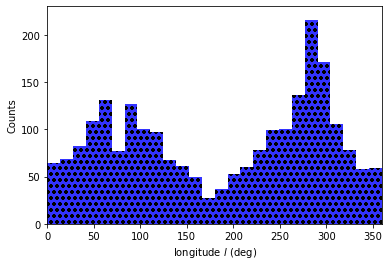

In [108]:
#Figure 3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df1=pd.read_csv('final_type1.csv')

plt.hist(df1['l'],bins=26,color='blue',alpha=0.8,hatch='oo')
plt.xlabel('longitude $l$ (deg)')
plt.ylabel('Counts')
plt.ylim(0,230)
plt.xlim(0,360)
#plt.savefig('countvsl.jpg',dpi=1000)

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


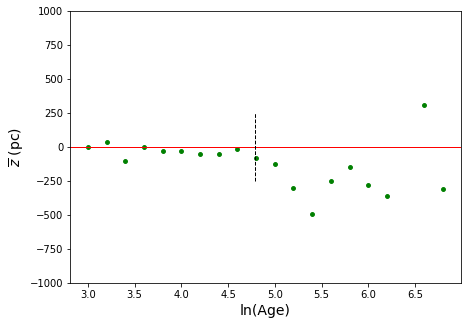

In [109]:
#Figure 4
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#reading csv files
df1=pd.read_csv('final_type1.csv')
df2=pd.read_csv('skowron.csv')

df2['l']=[x for x in df2['GLON']] #creating other columns in df2 with same name as that of df1
df2['b']=[x for x in df2['GLAT']]

#Truncating l and b of both dataframes upto 3 decimal places
df1['l'] = np.trunc(1000 * df1['l']) / 1000
df1['b'] = np.trunc(1000 * df1['b']) / 1000
df2['l'] = np.trunc(1000 * df2['l']) / 1000
df2['b'] = np.trunc(1000 * df2['b']) / 1000

#creating lists to append the common cepheids between df1 and df2 by comparing l and b upto 3 decimal places
listx=[]
listy=[]
listz=[]
listage=[]
listd=[]
listl=[]
listb=[]

#cross-matching l and b
for n1 in range (len(df1['l'])):
    for n3 in range (len(df2['l'])):
        if df1['l'][n1]==df2['l'][n3] and df1['b'][n1]==df2['b'][n3]:
            listx.append(df2['x'][n3])
            listy.append(df2['y'][n3])
            listz.append(df2['z'][n3])
            listage.append(df2['Age'][n3])
            listd.append(df2['Dist'][n3])
            listb.append(df2['GLAT'][n3])
            listl.append(df2['GLON'][n3])
            
#coverting lists to dataframe with each list as column in dataframe 
df=pd.DataFrame({'x':listx,'y':listy,'z':listz,'l':listl,'b':listb,'age':listage,'dist':listd})
df

df['logage']=np.log(df['age']) #creating column logage

#appending elements into different lists which lie in the specified range
data1 = [x for x in df['logage'] if 3<x<3.2]
data2 = [x for x in df['logage'] if 3.2<x<3.4]
data3 = [x for x in df['logage'] if 3.4<x<3.6]
data4 = [x for x in df['logage'] if 3.6<x<3.8]
data5 = [x for x in df['logage'] if 3.80<x<4.0]
data6 = [x for x in df['logage'] if 4.0<x<4.20]
data7 = [x for x in df['logage'] if 4.20<x<4.40]
data8 = [x for x in df['logage'] if 4.40<x<4.60]
data9 = [x for x in df['logage'] if 4.60<x<4.80]
data10 = [x for x in df['logage'] if 4.80<x<5.00]
data11 = [x for x in df['logage'] if 5.00<x<5.20]
data12 = [x for x in df['logage'] if 5.20<x<5.40]
data13 = [x for x in df['logage'] if 5.40<x<5.60]
data14 = [x for x in df['logage'] if 5.60<x<5.80]
data15 = [x for x in df['logage'] if 5.80<x<6.00]
data16 = [x for x in df['logage'] if 6.00<x<6.20]
data17 = [x for x in df['logage'] if 6.20<x<6.40]
data18 = [x for x in df['logage'] if 6.40<x<6.60]
data19 = [x for x in df['logage'] if 6.60<x<6.80]
data20 = [x for x in df['logage'] if 6.80<x<7.0]
dataz1=[]
dataz2=[]
dataz3=[]
dataz4=[]
dataz5=[]
dataz6=[]
dataz7=[]
dataz8=[]
dataz9=[]
dataz10=[]
dataz11=[]
dataz12=[]
dataz13=[]
dataz14=[]
dataz15=[]
dataz16=[]
dataz17=[]
dataz18=[]
dataz19 = []
dataz20 = []
meanz=[]


# comparing the data and appending z into the list by taking mean of the same.
for i in range(len(data1)):
    for j in range(len(df['logage'])):
        if data1[i]==df['logage'][j]:
            dataz1.append(df['z'][j])
meanz.append(np.mean(dataz1)) 

for i in range(len(data2)):
    for j in range(len(df['logage'])):
        if data2[i]==df['logage'][j]:
            dataz2.append(df['z'][j])
meanz.append(np.mean(dataz2))

for i in range(len(data3)):
    for j in range(len(df['logage'])):
        if data3[i]==df['logage'][j]:
            dataz3.append(df['z'][j])
meanz.append(np.mean(dataz3)) 

for i in range(len(data4)):
    for j in range(len(df['logage'])):
        if data4[i]==df['logage'][j]:
            dataz4.append(df['z'][j])
meanz.append(np.mean(dataz4) )

for i in range(len(data5)):
    for j in range(len(df['logage'])):
        if data5[i]==df['logage'][j]:
            dataz5.append(df['z'][j])
meanz.append(np.mean(dataz5))

for i in range(len(data6)):
    for j in range(len(df['logage'])):
        if data6[i]==df['logage'][j]:
            dataz6.append(df['z'][j])
meanz.append(np.mean(dataz6) )

for i in range(len(data7)):
    for j in range(len(df['logage'])):
        if data7[i]==df['logage'][j]:
            dataz7.append(df['z'][j])
meanz.append(np.mean(dataz7) )

for i in range(len(data8)):
    for j in range(len(df['logage'])):
        if data8[i]==df['logage'][j]:
            dataz8.append(df['z'][j])
meanz.append(np.mean(dataz8) )

for i in range(len(data9)):
    for j in range(len(df['logage'])):
        if data9[i]==df['logage'][j]:
            dataz9.append(df['z'][j])
meanz.append(np.mean(dataz9) )

for i in range(len(data10)):
    for j in range(len(df['logage'])):
        if data10[i]==df['logage'][j]:
            dataz10.append(df['z'][j])
meanz.append(np.mean(dataz10) )

for i in range(len(data11)):
    for j in range(len(df['logage'])):
        if data11[i]==df['logage'][j]:
            dataz11.append(df['z'][j])
meanz.append(np.mean(dataz11) )

for i in range(len(data12)):
    for j in range(len(df['logage'])):
        if data12[i]==df['logage'][j]:
            dataz12.append(df['z'][j])
meanz.append(np.mean(dataz12) )

for i in range(len(data13)):
    for j in range(len(df['logage'])):
        if data13[i]==df['logage'][j]:
            dataz13.append(df['z'][j])
meanz.append(np.mean(dataz13)) 

for i in range(len(data14)):
    for j in range(len(df['logage'])):
        if data14[i]==df['logage'][j]:
            dataz14.append(df['z'][j])
meanz.append(np.mean(dataz14) )

for i in range(len(data15)):
    for j in range(len(df['logage'])):
        if data15[i]==df['logage'][j]:
            dataz15.append(df['z'][j])
meanz.append(np.mean(dataz15) )

for i in range(len(data16)):
    for j in range(len(df['logage'])):
        if data16[i]==df['logage'][j]:
            dataz16.append(df['z'][j])
meanz.append(np.mean(dataz16) )

for i in range(len(data17)):
    for j in range(len(df['logage'])):
        if data17[i]==df['logage'][j]:
            dataz17.append(df['z'][j])
meanz.append(np.mean(dataz17) )

for i in range(len(data18)):
    for j in range(len(df['logage'])):
        if data18[i]==df['logage'][j]:
            dataz18.append(df['z'][j])
meanz.append(np.mean(dataz18) )

for i in range(len(data19)):
    for j in range(len(df['logage'])):
        if data19[i]==df['logage'][j]:
            dataz19.append(df['z'][j])
meanz.append(np.mean(dataz19) )

for i in range(len(data20)):
    for j in range(len(df['logage'])):
        if data20[i]==df['logage'][j]:
            dataz20.append(df['z'][j])
meanz.append(np.mean(dataz20))

plt.figure(figsize=(7,5))
x=np.arange(3,7,0.2) # defining x axis.
plt.scatter(x,meanz,s=15,color='green') # scatter plot of x{ln(Age)} and <z>
yt=[-1000,-750,-500,-250,0,250,500,750,1000] # defining tick points in y axis
plt.yticks(yt) # plotting y axis ticks
plt.axhline(y=0,c='r',linewidth=1) # draw horizontal red line about z=0
plt.ylim(-1000,1000) # specifying the scale limit on y axis
plt.xlabel('ln(Age)',fontsize=14) #label x axis
plt.ylabel('$\overline{z}$ (pc)',fontsize=14) # label y axis
plt.vlines(x=[4.787491742782046], ymin=[-250], ymax=[250], colors='black', ls='--', lw=1,) #dotted line is at x=log(120)= 4.787491742782046 with length being from -250 to 250
#plt.savefig('zlnage.jpg',dpi=1000)

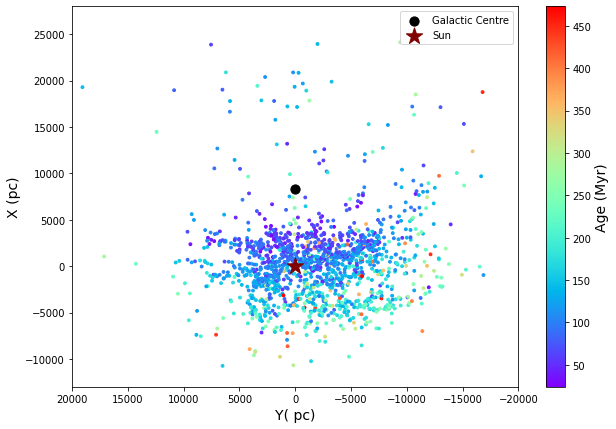

In [110]:
#Figure 5
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#reading csv files
df1=pd.read_csv('final_type1.csv')
df2=pd.read_csv('skowron.csv')

df2['l']=[x for x in df2['GLON']] #creating other columns with same name as that of df1
df2['b']=[x for x in df2['GLAT']]

#Truncating l and b upto 3 decimal places
df1['l'] = np.trunc(1000 * df1['l']) / 1000
df1['b'] = np.trunc(1000 * df1['b']) / 1000
df2['l'] = np.trunc(1000 * df2['l']) / 1000
df2['b'] = np.trunc(1000 * df2['b']) / 1000

#creating lists to append the common cepheids between df1 and df2 by comparing l and b upto 3 decimal places
listx=[]
listy=[]
listz=[]
listage=[]
listd=[]
listl=[]
listb=[]

#cross-matching l and b
for n1 in range (len(df1['l'])):
    for n3 in range (len(df2['l'])):
        if df1['l'][n1]==df2['l'][n3] and df1['b'][n1]==df2['b'][n3]:
            listx.append(df2['x'][n3])
            listy.append(df2['y'][n3])
            listz.append(df2['z'][n3])
            listage.append(df2['Age'][n3])
            listd.append(df2['Dist'][n3])
            listb.append(df2['GLAT'][n3])
            listl.append(df2['GLON'][n3])
            
#coverting lists to dataframe with each list as column in dataframe 
df_common=pd.DataFrame({'x':listx,'y':listy,'z':listz,'l':listl,'b':listb,'age':listage,'dist':listd})
df_common

plt.figure(figsize=(10,7)) # defining figure size

x_age=[] # list for x data 
y_age=[] # list for y data
a_age=[] # list for age data

#appending those Cepheids aged less than 500 Myr in different lists and plotting only those.
for i in range(len(df_common['age'])):
    if df_common['age'][i]<500:
        x_age.append(df_common['x'][i])
        y_age.append(df_common['y'][i])
        a_age.append(df_common['age'][i])
        

plt.scatter(x_age,y_age,c=a_age,s=8,cmap='rainbow') # scatter plot of x_age and y_age with c as color code for age with colormap(cmap) as rainbow 
cbar=plt.colorbar() #inserting colorbar
cbar.set_label('Age (Myr)',size=14) #labelling colorbar
plt.xlim(20000,-20000) # defining x scale limit
plt.xlabel('Y( pc)',fontsize=14) #labelling x axis
plt.ylim(-13000,28000) # defining y scale limit
plt.ylabel('X (pc)',fontsize=14) #labelling y axis
plt.scatter(x=0,y=8340,c='black',s=85,label="Galactic Centre") # Marking Galactic center in the MW galaxy with coordinates (0,8340)
plt.scatter(x=0,y=0,s=295,c='maroon',marker='*',label='Sun')# Marking the Sun in the MW galaxy with coordinates (0,0)
plt.legend() #legend of the Sun and GC
#plt.savefig('xy_age_colorplot.jpg',dpi=1000)

IQR= 128.14400112802338
bin-width 24.722926564532152
no.of bins= 45


Text(0, 0.5, 'Counts')

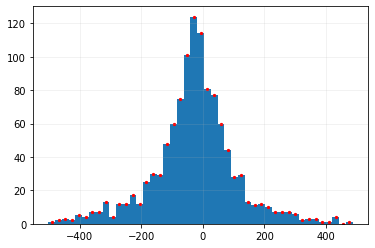

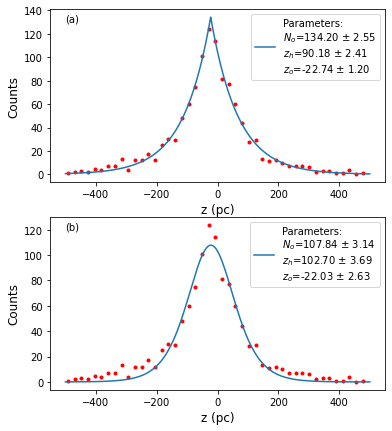

In [111]:
#Figure 7

import matplotlib.pylab as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit

#reading csv files
df1=pd.read_csv('final_type1.csv')
df2=pd.read_csv('skowron.csv')

df2['l']=[x for x in df2['GLON']] #creating other columns with same name as that of df1
df2['b']=[x for x in df2['GLAT']]

#Truncating l and b upto 3 decimal places
df1['l'] = np.trunc(1000 * df1['l']) / 1000
df1['b'] = np.trunc(1000 * df1['b']) / 1000
df2['l'] = np.trunc(1000 * df2['l']) / 1000
df2['b'] = np.trunc(1000 * df2['b']) / 1000

#creating lists to append the common cepheids between df1 and df2 by comparing l and b upto 3 decimal places
listx=[]
listy=[]
listz=[]
listage=[]
listd=[]
listl=[]
listb=[]

#cross-matching l and b
for n1 in range (len(df1['l'])):
    for n3 in range (len(df2['l'])):
        if df1['l'][n1]==df2['l'][n3] and df1['b'][n1]==df2['b'][n3]:
            listx.append(df2['x'][n3])
            listy.append(df2['y'][n3])
            listz.append(df2['z'][n3])
            listage.append(df2['Age'][n3])
            listd.append(df2['Dist'][n3])
            listb.append(df2['GLAT'][n3])
            listl.append(df2['GLON'][n3])
            
#coverting lists to dataframe with each list as column in dataframe 
df_common=pd.DataFrame({'x':listx,'y':listy,'z':listz,'l':listl,'b':listb,'age':listage,'dist':listd})

#CONSTRAINTS
for num in df_common['b']: # considering Cepheids with |b|<=4
    if np.abs(num)>4:
        df_common.drop(df_common.index[df_common['b'] == num], inplace=True)
        
for num in df_common['dist']: # comsidering Cepheids with heliocentric distance d < 8340 pc
    if num>8340:
        df_common.drop(df_common.index[df_common['dist'] == num], inplace=True)
        
data = df_common['z']

# Interquartile range (IQR)
IQR = stats.iqr(data, interpolation = 'midpoint')
  
print('IQR=',IQR)

binsw=IQR*2/np.cbrt(len(df_common['z'])) #binwidth
print('bin-width',binsw)

nbins=round(len(df_common['z'])/binsw)
print('no.of bins=',nbins) #no. of bins

# Usual histogram plot
n, bins, bars = plt.hist(data, bins=nbins) # n stores the counts whereas bins stores the value on X axis
plt.grid(alpha=0.2)


# Now we find the center of each bin from the bin edges and scatter plot
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
plt.scatter(bins_mean, n,s=5,color='r')
plt.grid(alpha=0.2)


def func(x, a, b,x_0): #Defining exponential function
    return a*np.exp(-np.abs(((x-x_0)/b)))

xdata=bins_mean
ydata=n
plt.figure(figsize=(6,7))
plt.subplot(211)
plt.plot(xdata,ydata,'r.')
initialG=[5,64,5] #Giving initial guess for the parameters
popt, pcov = curve_fit(func, xdata, ydata,initialG) # fitting the function , popt and pcov are matrices from curve_fit 
xFit=np.arange(-500,500,0.01) #specifying range(length) of fit
oneSigmaVariances = np.sqrt(np.diag(pcov)) # 1 sigma for error
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],popt[1], oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
plt.text(-500,130,'(a)') # placing text at specified coordinates
plt.legend()
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)

#same drill sec^{2}h FIT
def func(x, a, b,x_0):
    return a / (np.cosh((x-x_0)/b))**2
xdata=bins_mean
ydata=n
plt.subplot(212)
plt.plot(xdata,ydata,'r.')
initialG=[6,-33,14.5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-500,500,0.01)
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],np.abs(popt[1]), oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
plt.text(-500,120,'(b)')
plt.legend()
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)
#plt.savefig('firstdfcom,chop.sech2.jpg',dpi=1000)

IQR= 189.8602775820358
bin-width= 33.20118434084156
no. of bins = 45


Text(0, 0.5, 'Counts')

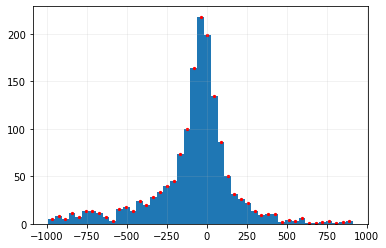

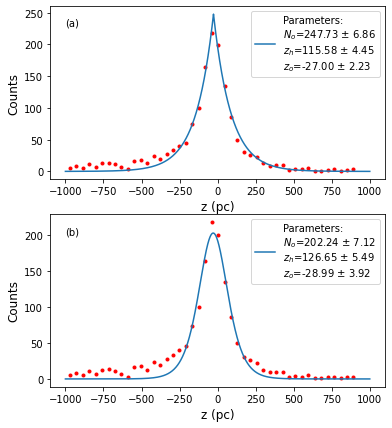

In [116]:
#Figure 8

import matplotlib.pylab as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit

#reading csv files
df1=pd.read_csv('final_type1.csv')
df2=pd.read_csv('skowron.csv')

df2['l']=[x for x in df2['GLON']] #creating other columns with same name as that of df1
df2['b']=[x for x in df2['GLAT']]

#Truncating l and b upto 3 decimal places
df1['l'] = np.trunc(1000 * df1['l']) / 1000
df1['b'] = np.trunc(1000 * df1['b']) / 1000
df2['l'] = np.trunc(1000 * df2['l']) / 1000
df2['b'] = np.trunc(1000 * df2['b']) / 1000

#creating lists to append the common cepheids between df1 and df2 by comparing l and b upto 3 decimal places
listx=[]
listy=[]
listz=[]
listage=[]
listd=[]
listl=[]
listb=[]

#cross-matching l and b
for n1 in range (len(df1['l'])):
    for n3 in range (len(df2['l'])):
        if df1['l'][n1]==df2['l'][n3] and df1['b'][n1]==df2['b'][n3]:
            listx.append(df2['x'][n3])
            listy.append(df2['y'][n3])
            listz.append(df2['z'][n3])
            listage.append(df2['Age'][n3])
            listd.append(df2['Dist'][n3])
            listb.append(df2['GLAT'][n3])
            listl.append(df2['GLON'][n3])
            
#coverting lists to dataframe with each list as column in dataframe 
df_common=pd.DataFrame({'x':listx,'y':listy,'z':listz,'l':listl,'b':listb,'age':listage,'dist':listd})

data = df_common['z']
dt=[]
for i in data:
    if -1000<i<1000:
        dt.append(i)
        
# Interquartile range (IQR)
IQR = stats.iqr(dt, interpolation = 'midpoint')  
print('IQR=',IQR)
binsw=IQR*2/np.cbrt(len(dt)) #binwidth
print('bin-width=',binsw)
nbins=round(len(dt)/binsw)

#no. of bins
print('no. of bins =',nbins)

# Usual histogram plot
n, bins, bars = plt.hist(dt, bins=nbins)

plt.grid(alpha=0.2)

bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
plt.scatter(bins_mean, n,s=5,color='r')
plt.grid(alpha=0.2)


def func(x, a, b,x_0):
    return a*np.exp(-np.abs(((x-x_0)/b)))
xdata=bins_mean
ydata=n
plt.figure(figsize=(6,7))
plt.subplot(211)
plt.plot(xdata,ydata,'r.')
initialG=[5,64,5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-1000,1000,0.01)
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],popt[1], oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))#Parameters:\n$N_o$=%5.2f,\n $z_{h}$=%5.2f \n $z_0$=%5.2f'  % tuple(popt))
#plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$=%5.2f,\n $z_{h}$=%5.2f \n $z_0$=%5.2f'  % tuple(popt))
plt.text(-1000,230,'(a)')
plt.legend()
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)

#SEC2H FIT
def func(x, a, b,x_0):
    return a / (np.cosh((x-x_0)/b))**2
xdata=bins_mean
ydata=n
plt.subplot(212)
plt.plot(xdata,ydata,'r.')
initialG=[6,-33,14.5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-1000,1000,0.01)
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],np.abs(popt[1]), oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
#plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$=%5.3f,\n $z_{h}$=%5.3f \n $z_0$=%5.3f'  % tuple(popt))
plt.text(-1000,200,'(b)')
plt.legend()
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)
#plt.savefig('firstdfcom,chop.sech2.jpg',dpi=1000)

IQR= 92.16348621761534
bin-width= 21.21392081414523
no.of bins= 31


Text(0, 0.5, 'Counts')

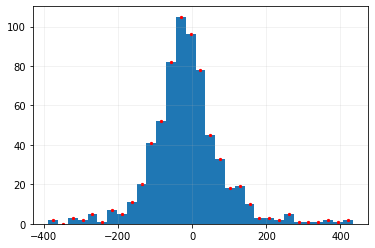

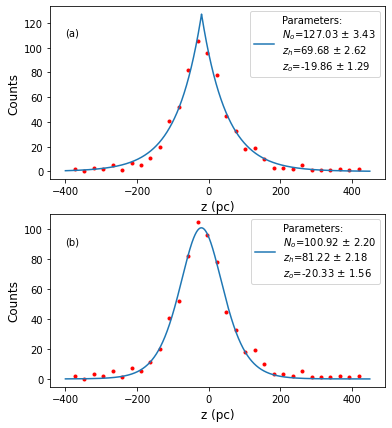

In [117]:
#Figure 9

import matplotlib.pylab as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit

#reading csv files
df1=pd.read_csv('final_type1.csv')
df2=pd.read_csv('skowron.csv')

df2['l']=[x for x in df2['GLON']] #creating other columns with same name as that of df1
df2['b']=[x for x in df2['GLAT']]

#Truncating l and b upto 3 decimal places
df1['l'] = np.trunc(1000 * df1['l']) / 1000
df1['b'] = np.trunc(1000 * df1['b']) / 1000
df2['l'] = np.trunc(1000 * df2['l']) / 1000
df2['b'] = np.trunc(1000 * df2['b']) / 1000

#creating lists to append the common cepheids between df1 and df2 by comparing l and b upto 3 decimal places
listx=[]
listy=[]
listz=[]
listage=[]
listd=[]
listl=[]
listb=[]

#cross-matching l and b
for n1 in range (len(df1['l'])):
    for n3 in range (len(df2['l'])):
        if df1['l'][n1]==df2['l'][n3] and df1['b'][n1]==df2['b'][n3]:
            listx.append(df2['x'][n3])
            listy.append(df2['y'][n3])
            listz.append(df2['z'][n3])
            listage.append(df2['Age'][n3])
            listd.append(df2['Dist'][n3])
            listb.append(df2['GLAT'][n3])
            listl.append(df2['GLON'][n3])
            
#coverting lists to dataframe with each list as column in dataframe 
df_common=pd.DataFrame({'x':listx,'y':listy,'z':listz,'l':listl,'b':listb,'age':listage,'dist':listd})

for num in df_common['b']:
    if np.abs(num)>4:
        df_common.drop(df_common.index[df_common['b'] == num], inplace=True)
        
for num in df_common['dist']:
    if num>8340:
        df_common.drop(df_common.index[df_common['dist'] == num], inplace=True)
        
for num in df_common['age']:
    if np.abs(num)>120:
        df_common.drop(df_common.index[df_common['age'] == num], inplace=True)

# Interquartile range (IQR)
data = df_common['z']
IQR = stats.iqr(data, interpolation = 'midpoint')
print('IQR=',IQR)

binsw=IQR*2/np.cbrt(len(df_common['z'])) #binwidth
print('bin-width=',binsw)

nbins=round(len(df_common['z'])/binsw)
print('no.of bins=',nbins) #no. of bins

# Usual histogram plot
n, bins, bars = plt.hist(data, bins=nbins)  # output is two arrays
plt.grid(alpha=0.2)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
plt.scatter(bins_mean, n,s=5,color='r')
plt.grid(alpha=0.2)


def func(x, a, b,x_0):
    return a*np.exp(-np.abs(((x-x_0)/b)))
xdata=bins_mean
ydata=n
plt.figure(figsize=(6,7))
plt.subplot(211)
plt.plot(xdata,ydata,'r.')
initialG=[50,64,14.5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-400,450,0.01)
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],popt[1], oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
plt.legend()
plt.text(-400,110,'(a)')
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)

#SEC2H FIT
def func(x, a, b,x_0):
    return a / (np.cosh((x-x_0)/b))**2
xdata=bins_mean
ydata=n
plt.subplot(212)
plt.plot(xdata,ydata,'r.')
initialG=[6,133,14.5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-400,450,0.01)
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],popt[1], oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
plt.legend()
plt.text(-400,90,'(b)')
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)
#plt.savefig('le120dfcom,sech2.jpg',dpi=1000)

Text(0, 0.5, 'Counts')

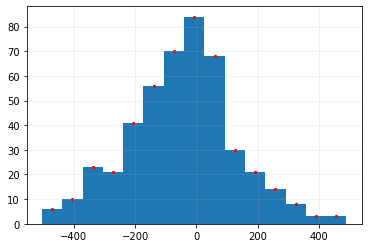

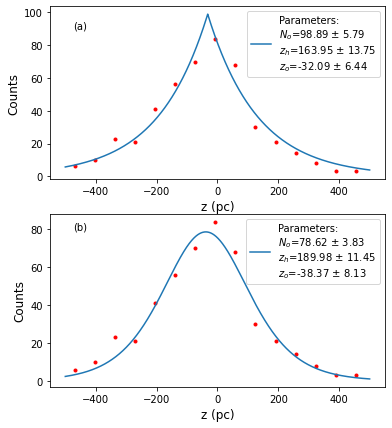

In [118]:
#Figure 10

import matplotlib.pylab as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit

#reading csv files
df1=pd.read_csv('final_type1.csv')
df2=pd.read_csv('skowron.csv')

df2['l']=[x for x in df2['GLON']] #creating other columns with same name as that of df1
df2['b']=[x for x in df2['GLAT']]

#Truncating l and b upto 3 decimal places
df1['l'] = np.trunc(1000 * df1['l']) / 1000
df1['b'] = np.trunc(1000 * df1['b']) / 1000
df2['l'] = np.trunc(1000 * df2['l']) / 1000
df2['b'] = np.trunc(1000 * df2['b']) / 1000

#creating lists to append the common cepheids between df1 and df2 by comparing l and b upto 3 decimal places
listx=[]
listy=[]
listz=[]
listage=[]
listd=[]
listl=[]
listb=[]

#cross-matching l and b
for n1 in range (len(df1['l'])):
    for n3 in range (len(df2['l'])):
        if df1['l'][n1]==df2['l'][n3] and df1['b'][n1]==df2['b'][n3]:
            listx.append(df2['x'][n3])
            listy.append(df2['y'][n3])
            listz.append(df2['z'][n3])
            listage.append(df2['Age'][n3])
            listd.append(df2['Dist'][n3])
            listb.append(df2['GLAT'][n3])
            listl.append(df2['GLON'][n3])
            
#coverting lists to dataframe with each list as column in dataframe 
df_common=pd.DataFrame({'x':listx,'y':listy,'z':listz,'l':listl,'b':listb,'age':listage,'dist':listd})

for num in df_common['b']:
    if np.abs(num)>4:
        df_common.drop(df_common.index[df_common['b'] == num], inplace=True)
        
for num in df_common['dist']:
    if num>8340:
        df_common.drop(df_common.index[df_common['dist'] == num], inplace=True)
        
for num in df_common['age']:
    if np.abs(num)<=120:
        df_common.drop(df_common.index[df_common['age'] == num], inplace=True)

from scipy import stats
  
# Interquartile range (IQR)
data = df_common['z']
IQR = stats.iqr(data, interpolation = 'midpoint')
binsw=IQR*2/np.cbrt(len(df_common['z'])) #binwidth
#print(binsw)
nbins=round(len(df_common['z'])/binsw)
#print('no.of bins=',nbins) #no. of bins
# Usual histogram plot
n, bins, bars = plt.hist(data, bins=15)  # output is two arrays

# Scatter plot
# Now we find the center of each bin from the bin edges
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
plt.scatter(bins_mean, n,s=5,color='r')
plt.grid(alpha=0.2)



def func(x, a, b,x_0):
    return a*np.exp(-np.abs(((x-x_0)/b)))
xdata=bins_mean
ydata=n
plt.figure(figsize=(6,7))
plt.subplot(211)
plt.plot(xdata,ydata,'r.')
initialG=[20,64,1.5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-500,500,0.01)
#plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$=%5.3f,\n $z_{h}$=%5.3f \n $z_0$=%5.3f'  % tuple(popt))
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],popt[1], oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
plt.legend()
plt.text(-475,90,'(a)')
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)


#SEC2H FIT
def func(x, a, b,x_0):
    return a / (np.cosh((x-x_0)/b))**2
xdata=bins_mean
ydata=n
plt.subplot(212)
plt.plot(xdata,ydata,'r.')
initialG=[600,133,14.5]
popt, pcov = curve_fit(func, xdata, ydata,initialG)
xFit=np.arange(-500,500,0.01)
#plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$=%5.3f,\n $z_{h}$=%5.3f \n $z_0$=%5.3f'  % tuple(popt))
oneSigmaVariances = np.sqrt(np.diag(pcov))
plt.plot(xFit,func(xFit,*popt),label='Parameters:\n$N_o$={:.2f} $\pm$ {:.2f}\n$z_h$={:.2f} $\pm$ {:.2f}\n$z_o$={:.2f} $\pm$ {:.2f}'.format(popt[0], oneSigmaVariances[0],popt[1], oneSigmaVariances[1],popt[2], oneSigmaVariances[2]))
plt.legend()
plt.text(-475,80,'(b)')
plt.xlabel('z (pc)',fontsize=12)
plt.ylabel('Counts',fontsize=12)
#plt.savefig('gt120dfcom,sech2.jpg',dpi=1000)